In [265]:
import pandas as pd

In [266]:
df=pd.read_csv("train.csv")
df.head(123)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
120,173,aftershock,"Oshawa, Canada",#WisdomWed BONUS - 5 Minute Daily Habits that ...,0
121,174,aftershock,Baker City Oregon,Aftershock: Protect Yourself and Profit in the...,0


In [267]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [268]:
target=df[['target']]
target


,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


In [269]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [270]:
df['location'].value_counts()  # not much use

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [271]:
new_df=df[['keyword','text']]
new_df

,keyword,text
0,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,NaN,Two giant cranes holding a bridge collapse int...
7609,NaN,@aria_ahrary @TheTawniest The out of control w...
7610,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,NaN,Police investigating after an e-bike collided ...


In [272]:
new_df['keyword'].mode()

0    fatalities
Name: keyword, dtype: object

In [273]:
new_df[new_df['keyword']=="fatalities"].count()

keyword    45
text       45
dtype: int64

In [274]:
test=pd.read_csv("test.csv")
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [275]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [276]:
import numpy as np
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
impute=impute.fit(new_df)
new_df=impute.transform(new_df)


In [277]:
new_df.shape

(7613, 2)

In [278]:
data=pd.DataFrame(new_df,columns=['keyword','text'])

In [279]:
data

,keyword,text
0,fatalities,Our Deeds are the Reason of this #earthquake M...
1,fatalities,Forest fire near La Ronge Sask. Canada
2,fatalities,All residents asked to 'shelter in place' are ...
3,fatalities,"13,000 people receive #wildfires evacuation or..."
4,fatalities,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,fatalities,Two giant cranes holding a bridge collapse int...
7609,fatalities,@aria_ahrary @TheTawniest The out of control w...
7610,fatalities,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,fatalities,Police investigating after an e-bike collided ...


In [280]:
data['merge']=data['keyword']+" "+data['text']

In [281]:
data

,keyword,text,merge
0,fatalities,Our Deeds are the Reason of this #earthquake M...,fatalities Our Deeds are the Reason of this #e...
1,fatalities,Forest fire near La Ronge Sask. Canada,fatalities Forest fire near La Ronge Sask. Canada
2,fatalities,All residents asked to 'shelter in place' are ...,fatalities All residents asked to 'shelter in ...
3,fatalities,"13,000 people receive #wildfires evacuation or...","fatalities 13,000 people receive #wildfires ev..."
4,fatalities,Just got sent this photo from Ruby #Alaska as ...,fatalities Just got sent this photo from Ruby ...
...,...,...,...
7608,fatalities,Two giant cranes holding a bridge collapse int...,fatalities Two giant cranes holding a bridge c...
7609,fatalities,@aria_ahrary @TheTawniest The out of control w...,fatalities @aria_ahrary @TheTawniest The out o...
7610,fatalities,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,fatalities M1.94 [01:04 UTC]?5km S of Volcano ...
7611,fatalities,Police investigating after an e-bike collided ...,fatalities Police investigating after an e-bik...


In [282]:
merge_data=data[['merge']]
merge_data

,merge
0,fatalities Our Deeds are the Reason of this #e...
1,fatalities Forest fire near La Ronge Sask. Canada
2,fatalities All residents asked to 'shelter in ...
3,"fatalities 13,000 people receive #wildfires ev..."
4,fatalities Just got sent this photo from Ruby ...
...,...
7608,fatalities Two giant cranes holding a bridge c...
7609,fatalities @aria_ahrary @TheTawniest The out o...
7610,fatalities M1.94 [01:04 UTC]?5km S of Volcano ...
7611,fatalities Police investigating after an e-bik...


In [283]:
merge_data['merge']=merge_data['merge'].apply(lambda x:x.lower())

/tmp/ipykernel_3939/2419299535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['merge']=merge_data['merge'].apply(lambda x:x.lower())


In [284]:
merge_data

,merge
0,fatalities our deeds are the reason of this #e...
1,fatalities forest fire near la ronge sask. canada
2,fatalities all residents asked to 'shelter in ...
3,"fatalities 13,000 people receive #wildfires ev..."
4,fatalities just got sent this photo from ruby ...
...,...
7608,fatalities two giant cranes holding a bridge c...
7609,fatalities @aria_ahrary @thetawniest the out o...
7610,fatalities m1.94 [01:04 utc]?5km s of volcano ...
7611,fatalities police investigating after an e-bik...


## Remove Special Characters and Link

In [285]:
import re

In [286]:
text=re.sub(r"http\S+", "", merge_data['merge'][239])

In [287]:
re.sub('[^A-Za-z0-9]+', ' ',text)

'annihilated annihilated in damascus syrian army grinds alloosh and his gang into the manure pile '

In [288]:
import re
def remove_specialChar(x):
    text=re.sub(r"http\S+", "", x)
    text=re.sub('[^A-Za-z0-9]+', ' ',text)
    return text

In [289]:
new_data=merge_data

In [290]:
merge_data['merge']=merge_data['merge'].apply(remove_specialChar)

/tmp/ipykernel_3939/248197913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['merge']=merge_data['merge'].apply(remove_specialChar)


## Remove Stopwords

In [291]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [292]:
def remove_stopwords(data):
    data=data.split()
    a=[]
    for i in data:
        if i not in stop:
            a.append(i)
    return " ".join(a)

In [293]:
merge_data['merge']=merge_data['merge'].apply(remove_stopwords)

/tmp/ipykernel_3939/2520180783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['merge']=merge_data['merge'].apply(remove_stopwords)


In [294]:
merge_data

,merge
0,fatalities deeds reason earthquake may allah f...
1,fatalities forest fire near la ronge sask canada
2,fatalities residents asked shelter place notif...
3,fatalities 13 000 people receive wildfires eva...
4,fatalities got sent photo ruby alaska smoke wi...
...,...
7608,fatalities two giant cranes holding bridge col...
7609,fatalities aria ahrary thetawniest control wil...
7610,fatalities m1 94 01 04 utc 5km volcano hawaii
7611,fatalities police investigating e bike collide...


## Plot WordCloud

In [295]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [296]:
all_text=[]
for i in merge_data['merge']:
    for w in i.split():
        all_text.append(w)
text_total=" ".join(all_text)

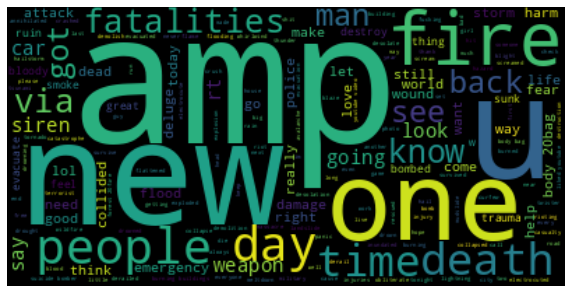

In [297]:
word_cloud = WordCloud(collocations = True, background_color = 'black').generate(text_total)
# Display the generated Word Cloud
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stemming and Apply trick for small length word removal

In [298]:
target.value_counts()

target
0         4342
1         3271
dtype: int64

In [299]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stemming(data):
    a=[]
    for i in data.split():
        a.append(stemmer.stem(i))
    return " ".join(a)



In [300]:
merge_data['merge']=merge_data['merge'].apply(stemming)


/tmp/ipykernel_3939/3450318402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['merge']=merge_data['merge'].apply(stemming)


In [301]:
alpha="qwertyuioplkjhgfdsazxcvbnm"
def trick(data):
    a=[]
    for i in data.split():
        if len(i)>2 and i[0] in alpha:
            a.append(i)
    return " ".join(a)

In [302]:
merge_data['merge']=merge_data['merge'].apply(trick)

/tmp/ipykernel_3939/311214905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data['merge']=merge_data['merge'].apply(trick)


In [303]:
merge_data

,merge
0,fatal deed reason earthquak may allah forgiv
1,fatal forest fire near rong sask canada
2,fatal resid ask shelter place notifi offic eva...
3,fatal peopl receiv wildfir evacu order california
4,fatal got sent photo rubi alaska smoke wildfir...
...,...
7608,fatal two giant crane hold bridg collaps nearb...
7609,fatal aria ahrari thetawniest control wild fir...
7610,fatal utc volcano hawaii
7611,fatal polic investig bike collid car littl por...


## Modified WordCloud

In [304]:
fully_modify=[]
for i in merge_data['merge']:
    for w in i.split():
        fully_modify.append(w)
modified=" ".join(fully_modify)

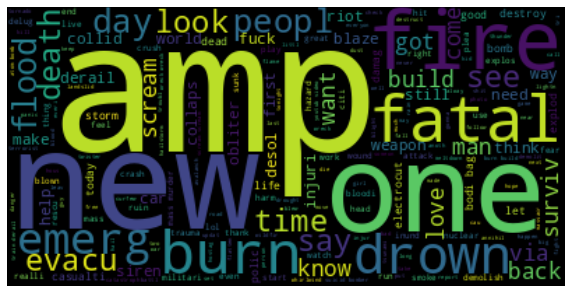

In [305]:
word_cloud = WordCloud(collocations = True, background_color = 'black').generate(modified)
# Display the generated Word Cloud
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [306]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vectorize=CountVectorizer()
tfidf=TfidfVectorizer()


In [307]:
X=tfidf.fit_transform(merge_data['merge']).toarray()   # use TfidfVectorizer

In [308]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [309]:
y=target['target']

In [310]:
y.shape

(7613,)

In [311]:
X.shape

(7613, 12881)

## Apply model and check accuracy

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [313]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [314]:
model_mnb=MultinomialNB()
model_mnb.fit(X_train,y_train)
predict=model_mnb.predict(X_test)
print("MNB: ",accuracy_score(y_test,predict))

MNB:  0.8089297439264609


In [315]:
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)
predict=model_gnb.predict(X_test)
print("GNB: ",accuracy_score(y_test,predict))

GNB:  0.5843729481286933


In [316]:
log_=LogisticRegression()
log_.fit(X_train,y_train)
predict=log_.predict(X_test)
print("Logistic: ",accuracy_score(y_test,predict))

Logistic:  0.7925147734734077


In [317]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
predict=classifier_rf.predict(X_test)
print("Random Forest: ",accuracy_score(y_test,predict))

Random Forest:  0.6007879185817465


## Test File   and For Kaggle Submission 

In [318]:
df_test=pd.read_csv("test.csv")
test_file=df_test[['keyword','text']]

impute=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
impute=impute.fit(test_file)
test_file=impute.transform(test_file)

In [319]:
test_file=pd.DataFrame(test_file,columns=['keyword','text'])

In [320]:
test_file['merge']=test_file['keyword']+" "+test_file['text']
test_file=test_file[['merge']]

In [321]:
test_file

,merge
0,deluged Just happened a terrible car crash
1,deluged Heard about #earthquake is different c...
2,"deluged there is a forest fire at spot pond, g..."
3,deluged Apocalypse lighting. #Spokane #wildfires
4,deluged Typhoon Soudelor kills 28 in China and...
...,...
3258,deluged EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFE...
3259,deluged Storm in RI worse than last hurricane....
3260,deluged Green Line derailment in Chicago http:...
3261,deluged MEG issues Hazardous Weather Outlook (...


In [322]:
test_file['merge']=test_file['merge'].apply(lambda x:x.lower())

In [323]:
test_file['merge']=test_file['merge'].apply(remove_specialChar)
test_file['merge']=test_file['merge'].apply(remove_stopwords)
test_file['merge']=test_file['merge'].apply(stemming)
test_file['merge']=test_file['merge'].apply(trick)

In [324]:
test_file

,merge
0,delug happen terribl car crash
1,delug heard earthquak differ citi stay safe ev...
2,delug forest fire spot pond gees flee across s...
3,delug apocalyps light spokan wildfir
4,delug typhoon soudelor kill china taiwan
...,...
3258,delug earthquak safeti angel safeti fasten xrwn
3259,delug storm wors last hurrican citi amp hardes...
3260,delug green line derail chicago
3261,delug meg issu hazard weather outlook hwo


In [325]:
test_tfidf=tfidf.transform(test_file['merge']).toarray()   # use TfidfVectorizer
test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [326]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.0001,random_state=2)
best_MNBmodel=MultinomialNB()
best_MNBmodel.fit(X_train,y_train)

MultinomialNB()

In [327]:
pred=best_MNBmodel.predict(X_train)
accuracy_score(pred,y_train)

0.8807146610614819

In [328]:
final_prediction=best_MNBmodel.predict(test_tfidf)


In [329]:
final_prediction

array([0, 0, 1, ..., 1, 1, 1])

In [333]:
final_prediction.shape

(3263,)

In [331]:
sample=pd.read_csv('sample_submission.csv')

In [334]:
sample.shape

(3263, 2)

In [336]:
a=pd.DataFrame(final_prediction)

In [338]:
sample['target']=a[0]

In [341]:
sample.to_csv("submission.csv",index=False)